✅ Dataset loaded successfully!
Shape: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-nul

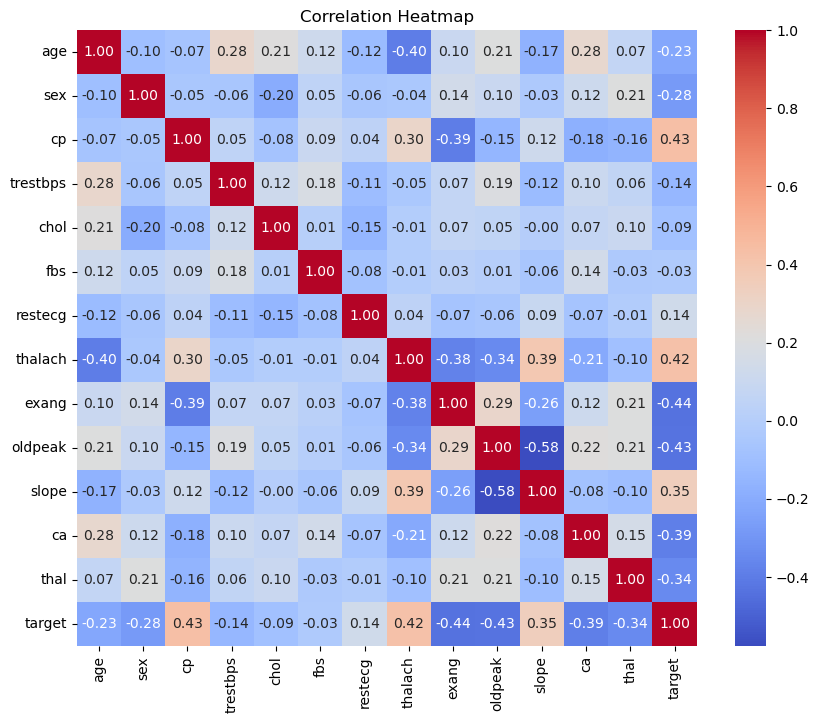


=== Logistic Regression ===
Accuracy: 0.8033
ROC-AUC: 0.869
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



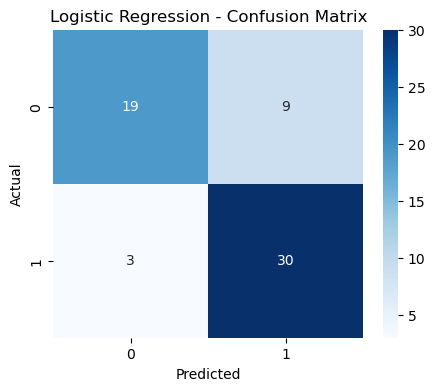

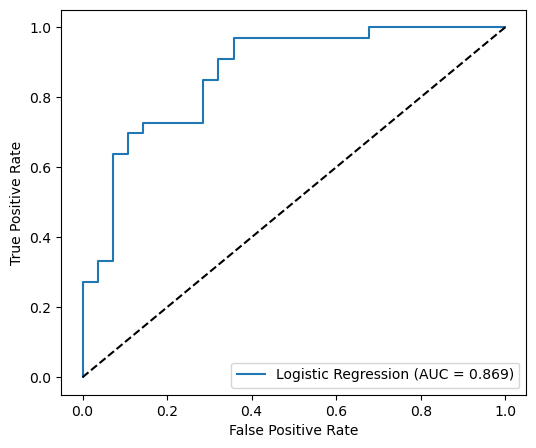


=== Decision Tree ===
Accuracy: 0.7869
ROC-AUC: 0.8176
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



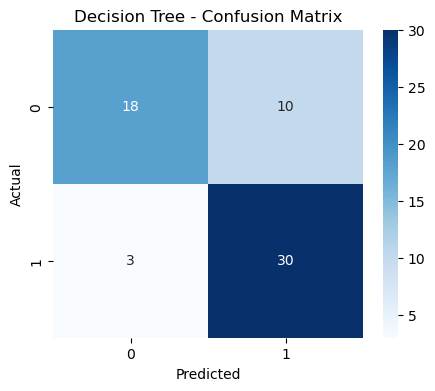

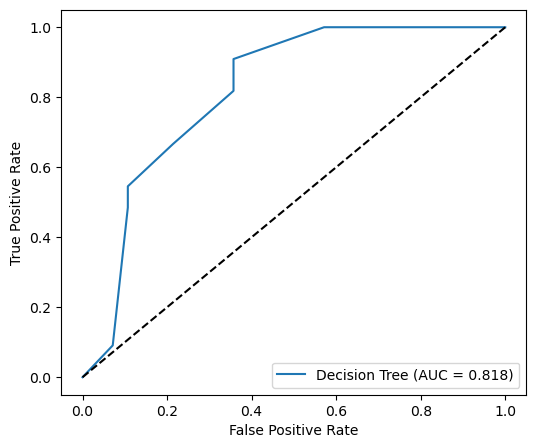


Top 10 features - Logistic Regression:
cp         0.937735
sex        0.714030
thal       0.621578
oldpeak    0.594819
ca         0.559203
thalach    0.539629
exang      0.475883
chol       0.459210
slope      0.307867
restecg    0.235471
dtype: float64

Top 10 features - Decision Tree:
cp          0.386753
oldpeak     0.166862
thal        0.116889
ca          0.076041
slope       0.053878
thalach     0.049646
trestbps    0.047794
age         0.040760
chol        0.033360
sex         0.028018
dtype: float64


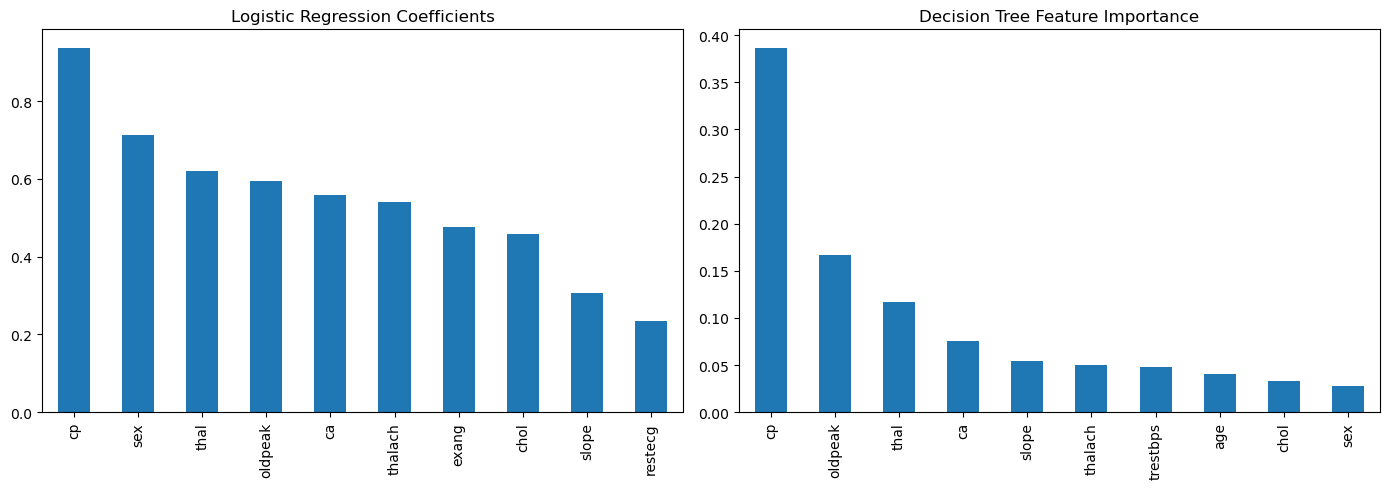


✅ Models saved successfully!


In [2]:
# ------------------------------
# 📌 Task 3: Heart Disease Prediction
# ------------------------------

# Step 0: Install libraries (only needed in Colab or first time locally)
# !pip install pandas numpy matplotlib seaborn scikit-learn joblib

import warnings
warnings.filterwarnings("ignore")

# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer

import joblib

# ------------------------------
# Step 2: Load dataset
df = pd.read_csv("heart.csv")  # Make sure heart.csv is in the same folder
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

# ------------------------------
# Step 3: Basic info and missing values
print("\nInfo:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

# ------------------------------
# Step 4: EDA - Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ------------------------------
# Step 5: Preprocessing

target_col = "target"
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove(target_col)

# Impute missing values (if any)
num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# ------------------------------
# Step 6: Train-test split
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numeric features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# ------------------------------
# Step 7: Train models

# Logistic Regression
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train, y_train)
y_pred_log = log_clf.predict(X_test)
y_prob_log = log_clf.predict_proba(X_test)[:,1]

# Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
y_prob_tree = tree_clf.predict_proba(X_test)[:,1]

# ------------------------------
# Step 8: Evaluation function
def evaluate_model(y_test, y_pred, y_prob, model_name):
    acc = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)
    print(f"\n=== {model_name} ===")
    print("Accuracy:", round(acc,4))
    print("ROC-AUC:", round(auc_score,4))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.3f})")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# ------------------------------
# Step 9: Evaluate both models
evaluate_model(y_test, y_pred_log, y_prob_log, "Logistic Regression")
evaluate_model(y_test, y_pred_tree, y_prob_tree, "Decision Tree")

# ------------------------------
# Step 10: Feature importance
coeffs = pd.Series(np.abs(log_clf.coef_[0]), index=X.columns).sort_values(ascending=False)
print("\nTop 10 features - Logistic Regression:")
print(coeffs.head(10))

imp = pd.Series(tree_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 features - Decision Tree:")
print(imp.head(10))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14,5))
coeffs.head(10).plot.bar(ax=axes[0], title="Logistic Regression Coefficients")
imp.head(10).plot.bar(ax=axes[1], title="Decision Tree Feature Importance")
plt.tight_layout()
plt.show()

# ------------------------------
# Step 11: Save models
joblib.dump(log_clf, "heart_logistic_model.joblib")
joblib.dump(tree_clf, "heart_tree_model.joblib")
print("\n✅ Models saved successfully!")
